In [204]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
raw_dataset = pd.read_csv('ce475_project_data.csv', delimiter=';')
dataset = raw_dataset.copy()
test_data = dataset.tail(20)
dataset = dataset.drop(test_data.index)

In [206]:
dataset.head()

,x1,x2,x3,x4,x5,x6,Y
0,1,37,12,65,-18,1,1.0
1,27,14,6,85,11,27,-24.0
2,34,13,14,63,-16,34,4092.0
3,5,18,24,83,-4,5,121.0
4,31,44,10,57,-7,31,2441.0


In [207]:
test_data.head()

,x1,x2,x3,x4,x5,x6,Y
100,8,46,30,32,5,8,NaN
101,10,23,16,27,13,10,NaN
102,6,9,28,76,-20,6,NaN
103,11,31,3,46,-11,11,NaN
104,12,27,0,98,20,12,NaN


In [208]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      120 non-null    int64  
 1   x2      120 non-null    int64  
 2   x3      120 non-null    int64  
 3   x4      120 non-null    int64  
 4   x5      120 non-null    int64  
 5   x6      120 non-null    int64  
 6   Y       100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


In [209]:
print(raw_dataset.isna().sum())

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
Y     20
dtype: int64


In [210]:
dataset.describe().transpose()[['min', 'max', 'mean']]

,min,max,mean
x1,0.0,40.0,19.29
x2,0.0,50.0,22.53
x3,0.0,35.0,16.68
x4,0.0,100.0,50.60
x5,-20.0,20.0,-1.44
x6,0.0,40.0,19.29
Y,-42.0,12402.0,1746.82


In [211]:
predictors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

In [212]:
dataset.corr()

,x1,x2,x3,x4,x5,x6,Y
x1,1.000000,-0.167880,-0.051437,-0.153805,0.091953,1.000000,0.300764
x2,-0.167880,1.000000,-0.047579,-0.072409,-0.191095,-0.167880,0.071139
x3,-0.051437,-0.047579,1.000000,0.106278,0.070286,-0.051437,0.280280
x4,-0.153805,-0.072409,0.106278,1.000000,-0.137413,-0.153805,0.122084
x5,0.091953,-0.191095,0.070286,-0.137413,1.000000,0.091953,-0.508310
x6,1.000000,-0.167880,-0.051437,-0.153805,0.091953,1.000000,0.300764
Y,0.300764,0.071139,0.280280,0.122084,-0.508310,0.300764,1.000000


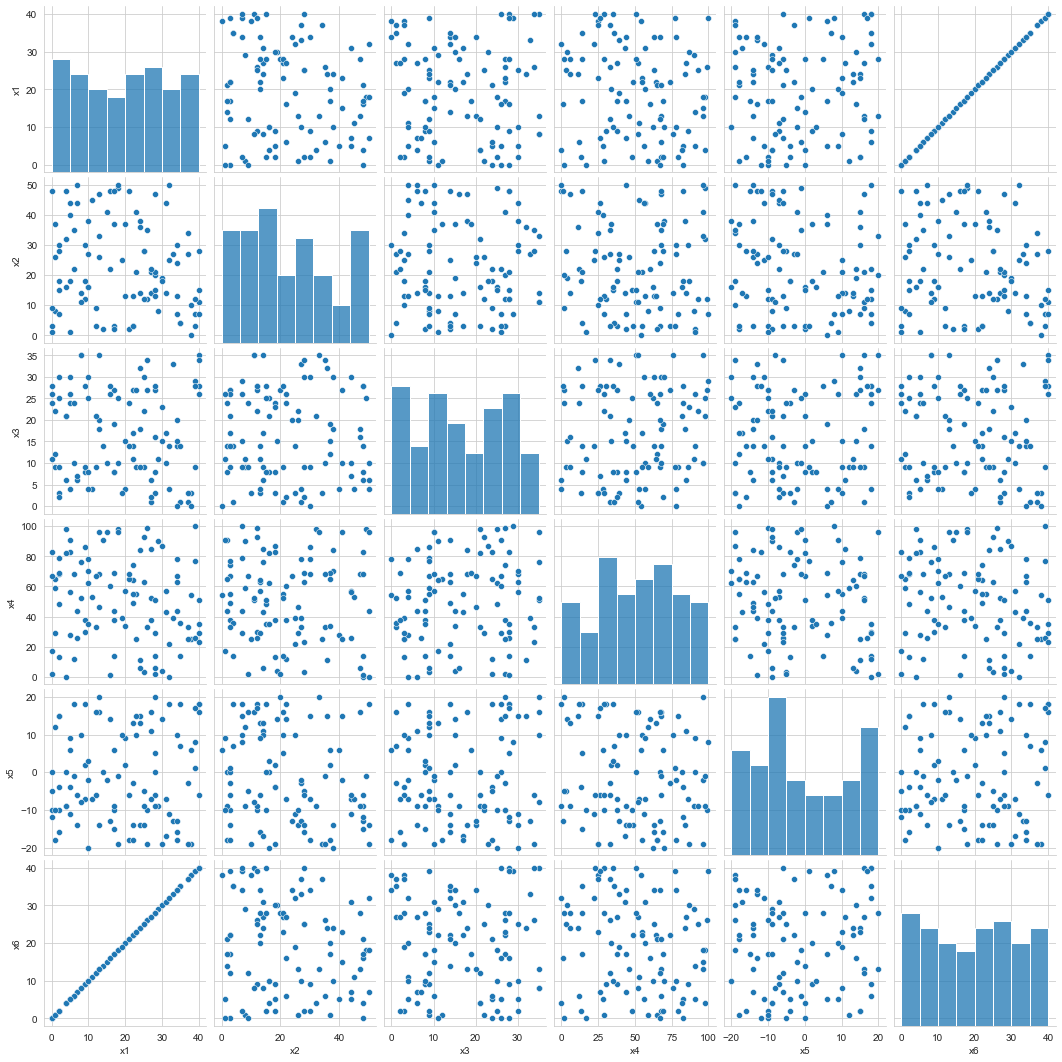

In [213]:
sns.pairplot(dataset[predictors])

In [214]:
dataset.drop(columns=['x6'], inplace=True, axis=1)
predictors.remove('x6')
test_data.drop(columns=['x6'], inplace=True, axis=1)

In [215]:
dataset.describe().transpose()[['min', 'max', 'mean', 'std']]

,min,max,mean,std
x1,0.0,40.0,19.29,12.315954
x2,0.0,50.0,22.53,15.019486
x3,0.0,35.0,16.68,10.375651
x4,0.0,100.0,50.60,28.242814
x5,-20.0,20.0,-1.44,12.270783
Y,-42.0,12402.0,1746.82,2696.083648


In [216]:
def linear_regression(x, y):
    cv_score = cross_val_score(estimator=LinearRegression(), X=x, y=y, cv=5, scoring='neg_root_mean_squared_error')
    cv_pred = cross_val_predict(estimator=LinearRegression(), X=x, y=y, cv=5)
    lr = LinearRegression()
    lr.fit(x, y)
    pred_score = lr.score(x, y)

    return cv_pred, cv_score, pred_score

In [217]:
cv_predictions, mse_score, score = linear_regression(x=dataset[predictors], y=dataset['Y'])

In [218]:
score

0.501304804757538

In [219]:
cv_predictions

array([ 2178.80460325,   357.03795683,  4965.56716213,  1593.47743742,
        3539.15066932,  -426.59685597,  3742.0942485 ,  2480.48542112,
        -676.53522484,  1165.94597094,  1102.29249826,   108.52740078,
        4543.35685884,  1038.16461816,  4030.27857559,  1763.64934395,
        4524.82587978,  3195.23980672,  -448.36729093,  3083.49870584,
        1869.18266119,  -856.83357494,  -204.19156566,  1208.64589153,
         342.50135542,  1745.01514596,  4437.70256078,  1069.27009791,
        3027.69724219, -1757.21712295,   148.09163931,  1960.03716789,
       -2810.08661089,  1249.24017843,  1862.26982685,  5063.38984928,
       -2216.48559393,  3070.71993964,   397.23992663,   352.93382537,
        2795.36645121,   861.3447297 ,  5293.70236081,  -592.72209813,
          41.22264781,  1194.98292381, -1854.89557859,  4292.57518949,
         602.31819475,  1729.82318022,  1367.85737965,  2643.70619159,
        2147.65694165,  -221.99229232,   423.33657925,  3972.75045102,
      

<AxesSubplot:xlabel='x5', ylabel='Y'>

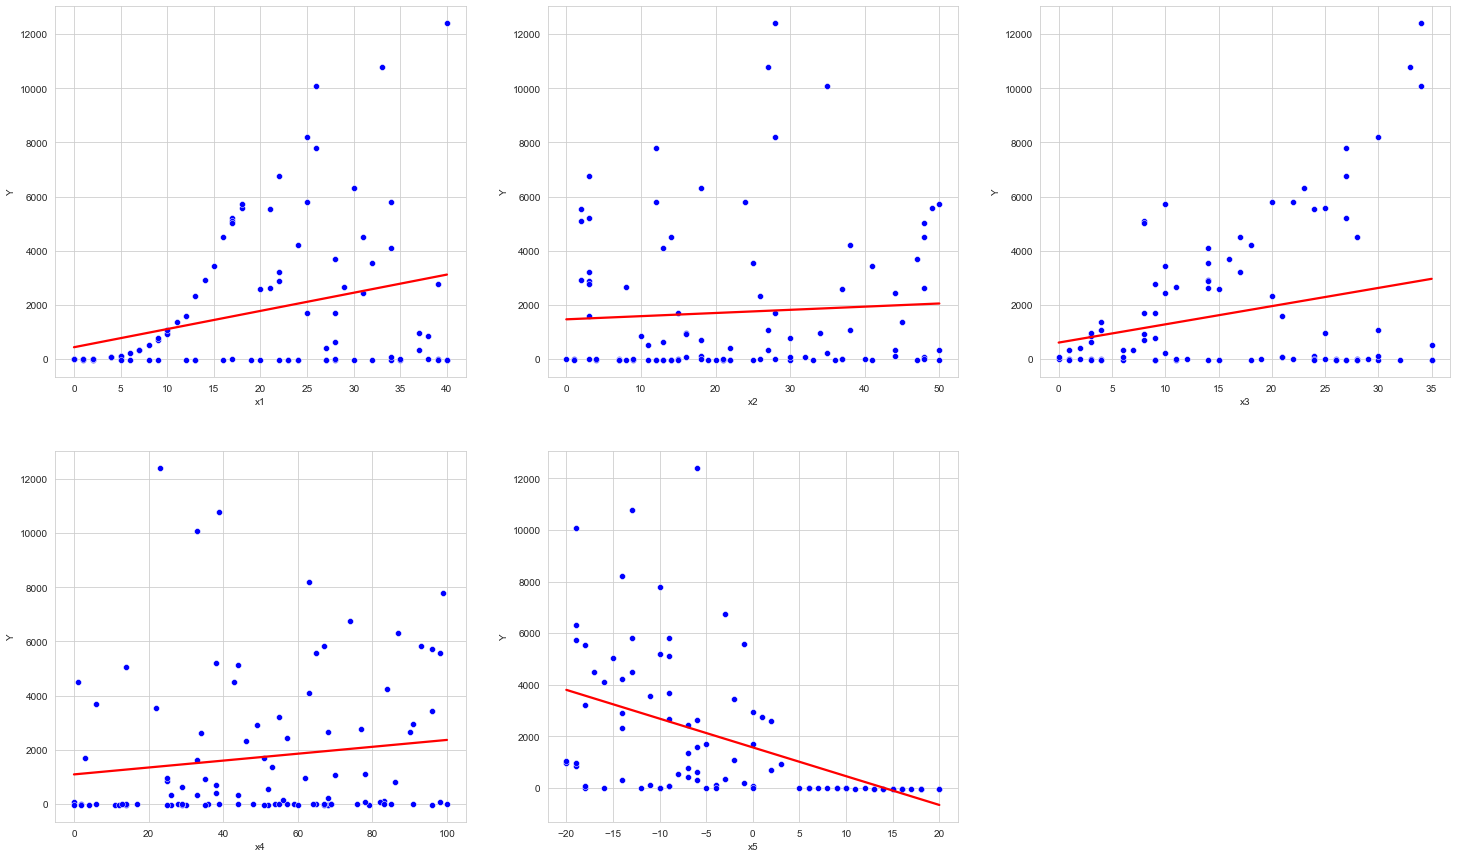

In [220]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 3, 1)
sns.scatterplot(x=dataset['x1'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x1'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 2)
sns.scatterplot(x=dataset['x2'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x2'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 3)
sns.scatterplot(x=dataset['x3'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x3'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 4)
sns.scatterplot(x=dataset['x4'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x4'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 5)
sns.scatterplot(x=dataset['x5'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x5'], y=cv_predictions, color='r', scatter=False, ci=False)

In [221]:
errors = pd.DataFrame([mse_score], columns=['x1', 'x2', 'x3', 'x4', 'x5'], index=['negative-mse']).sort_values('negative-mse', axis=1)
errors['mean'] = np.mean(mse_score)
errors

,x5,x3,x1,x2,x4,mean
negative-mse,-2429.893973,-2278.8514,-1965.113992,-1955.278777,-1389.341241,-2003.695876


In [222]:
lin_reg_dataset = dataset.copy()
lin_reg_dataset['Y_pred'] = cv_predictions
lin_reg_dataset

,x1,x2,x3,x4,x5,Y,Y_pred
0,1,37,12,65,-18,1.0,2178.804603
1,27,14,6,85,11,-24.0,357.037957
2,34,13,14,63,-16,4092.0,4965.567162
3,5,18,24,83,-4,121.0,1593.477437
4,31,44,10,57,-7,2441.0,3539.150669
...,...,...,...,...,...,...,...
95,10,27,4,78,-2,1091.0,274.319340
96,22,3,17,55,-18,3204.0,3720.629550
97,23,41,27,25,15,-31.0,791.251094
98,19,25,3,39,10,-20.0,-813.557547


In [223]:
def k_nearest_neighbors(x, y, k):
    cv_score = cross_val_score(estimator=KNeighborsRegressor(n_neighbors=k), X=x, y=y, cv=5, scoring='neg_root_mean_squared_error')
    cv_pred = cross_val_predict(estimator=KNeighborsRegressor(n_neighbors=k), X=x, y=y, cv=5)
    knn = KNeighborsRegressor()
    knn.fit(x, y)
    pred_score = knn.score(x, y)

    return cv_pred, cv_score, pred_score

In [224]:
cv_predictions, mse_score, score = k_nearest_neighbors(x=dataset[predictors], y=dataset['Y'], k=1)

In [225]:
score

0.7301876817364729

In [226]:
errors = pd.DataFrame([mse_score], columns=['x1', 'x2', 'x3', 'x4', 'x5'], index=['negative-mse']).sort_values('negative-mse', axis=1)
errors['mean'] = np.mean(mse_score)
errors

,x1,x2,x5,x3,x4,mean
negative-mse,-2447.280378,-2077.176305,-1868.299026,-1655.585153,-1207.6131,-1851.190792
